## **Importing required Modules**

In [ ]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings 
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [164]:
df = pd.read_csv(r"E:\Internship Projects\Credit Risk Prediction\train_u6lujuX_CVtuZ9i (1).csv")

In [165]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **Data Cleaning and Preprocessing**

In [166]:
df.shape

(614, 13)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [168]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [169]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [170]:
df.describe(include = "O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [171]:
df["Credit_History"].value_counts(normalize = True)

Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64

In [172]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [173]:
df["Gender"].replace(np.nan,"Male",inplace = True)

In [174]:
df["Married"].replace(np.nan,"Yes",inplace = True)

In [175]:
df["Dependents"].replace(np.nan,"0",inplace = True)

In [176]:
df["Self_Employed"].replace(np.nan,"No",inplace = True)

In [177]:
df["Loan_Status_Numeric"] = df["Loan_Status"].replace({"Y":1,"N":0})

In [178]:
df[["Loan_Status_Numeric","Loan_Amount_Term","LoanAmount","Credit_History"]].corr()

,Loan_Status_Numeric,Loan_Amount_Term,LoanAmount,Credit_History
Loan_Status_Numeric,1.000000,-0.021268,-0.037318,0.561678
Loan_Amount_Term,-0.021268,1.000000,0.039447,0.001470
LoanAmount,-0.037318,0.039447,1.000000,-0.008433
Credit_History,0.561678,0.001470,-0.008433,1.000000


In [179]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [180]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History         50
Property_Area           0
Loan_Status             0
Loan_Status_Numeric     0
dtype: int64

In [181]:
df.dropna(inplace = True)

In [182]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Loan_Status_Numeric    0
dtype: int64

In [183]:
df.shape

(564, 14)

## **Data Visulization**

In [184]:
df["Gender"].value_counts(normalize = True)

Gender
Male      0.820922
Female    0.179078
Name: proportion, dtype: float64

In [185]:
fig = px.histogram(df, x='Gender', color='Gender',
                   title='Count of Applicants by Gender',
                   labels={'Gender': 'Applicant Gender'},
                   text_auto=True)

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white"
)

fig.show()

In [186]:
(df.groupby("Gender")["Loan_Status"].value_counts(normalize = True) * 100).reset_index()

,Gender,Loan_Status,proportion
0,Female,Y,64.356436
1,Female,N,35.643564
2,Male,Y,69.114471
3,Male,N,30.885529


In [187]:
fig = px.histogram(df, x='Gender', color='Loan_Status',
                   barmode='group',  # side-by-side bars
                   text_auto=True,
                   title='Gender Distribution by Loan Status',
                   labels={'Gender': 'Applicant Gender', 'Loan_Status': 'Loan Approved?'})

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white"
)

fig.show()

In [188]:
df["Married"].value_counts()

Married
Yes    365
No     199
Name: count, dtype: int64

In [189]:
(df.groupby("Married")["Loan_Status"].value_counts(normalize = True) * 100).reset_index()

,Married,Loan_Status,proportion
0,No,Y,62.814070
1,No,N,37.185930
2,Yes,Y,71.232877
3,Yes,N,28.767123


In [190]:
fig = px.histogram(df, x='Married', color='Loan_Status',
                   barmode='group',  # side-by-side bars
                   text_auto=True,
                   title='Married Distribution by Loan Status',
                   labels={'Married': 'Applicant Matrial Status', 'Loan_Status': 'Loan Approved?'})

fig.update_layout(
    xaxis_title="Married",
    yaxis_title="Count",
    bargap=0.2,
    template="plotly_white"
)

fig.show()

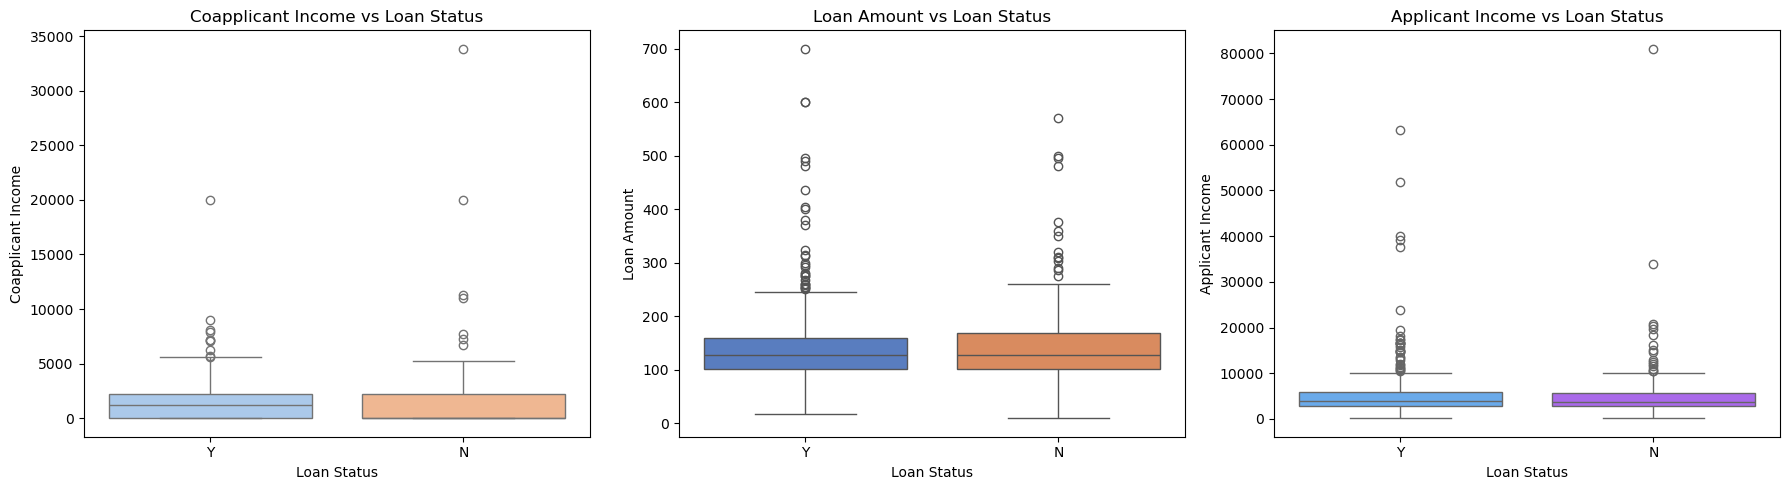

In [191]:
plt.figure(figsize=(18, 5))  

plt.subplot(1, 3, 1)
sns.boxplot(y=df["CoapplicantIncome"], x=df["Loan_Status"], palette='pastel')
plt.title("Coapplicant Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Coapplicant Income")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["LoanAmount"], x=df["Loan_Status"], palette='muted')
plt.title("Loan Amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["ApplicantIncome"], x=df["Loan_Status"], palette='cool')
plt.title("Applicant Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")

plt.tight_layout()
plt.show()

In [192]:
(df.groupby("Dependents")["Loan_Status"].value_counts(normalize = True) * 100).reset_index()

,Dependents,Loan_Status,proportion
0,0,Y,67.371601
1,0,N,32.628399
2,1,Y,66.666667
3,1,N,33.333333
4,2,Y,73.684211
5,2,N,26.315789
6,3+,Y,66.666667
7,3+,N,33.333333


In [193]:
df["Dependents"].value_counts()

Dependents
0     331
2      95
1      90
3+     48
Name: count, dtype: int64

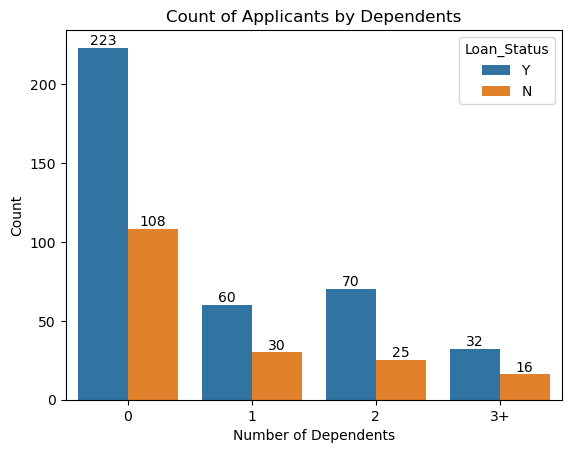

In [194]:
ax = sns.countplot(x = df["Dependents"],hue = df["Loan_Status"])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Count of Applicants by Dependents")
plt.show()

In [195]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    484
180.0     43
480.0     14
300.0     10
120.0      3
84.0       3
240.0      3
60.0       2
36.0       2
Name: count, dtype: int64

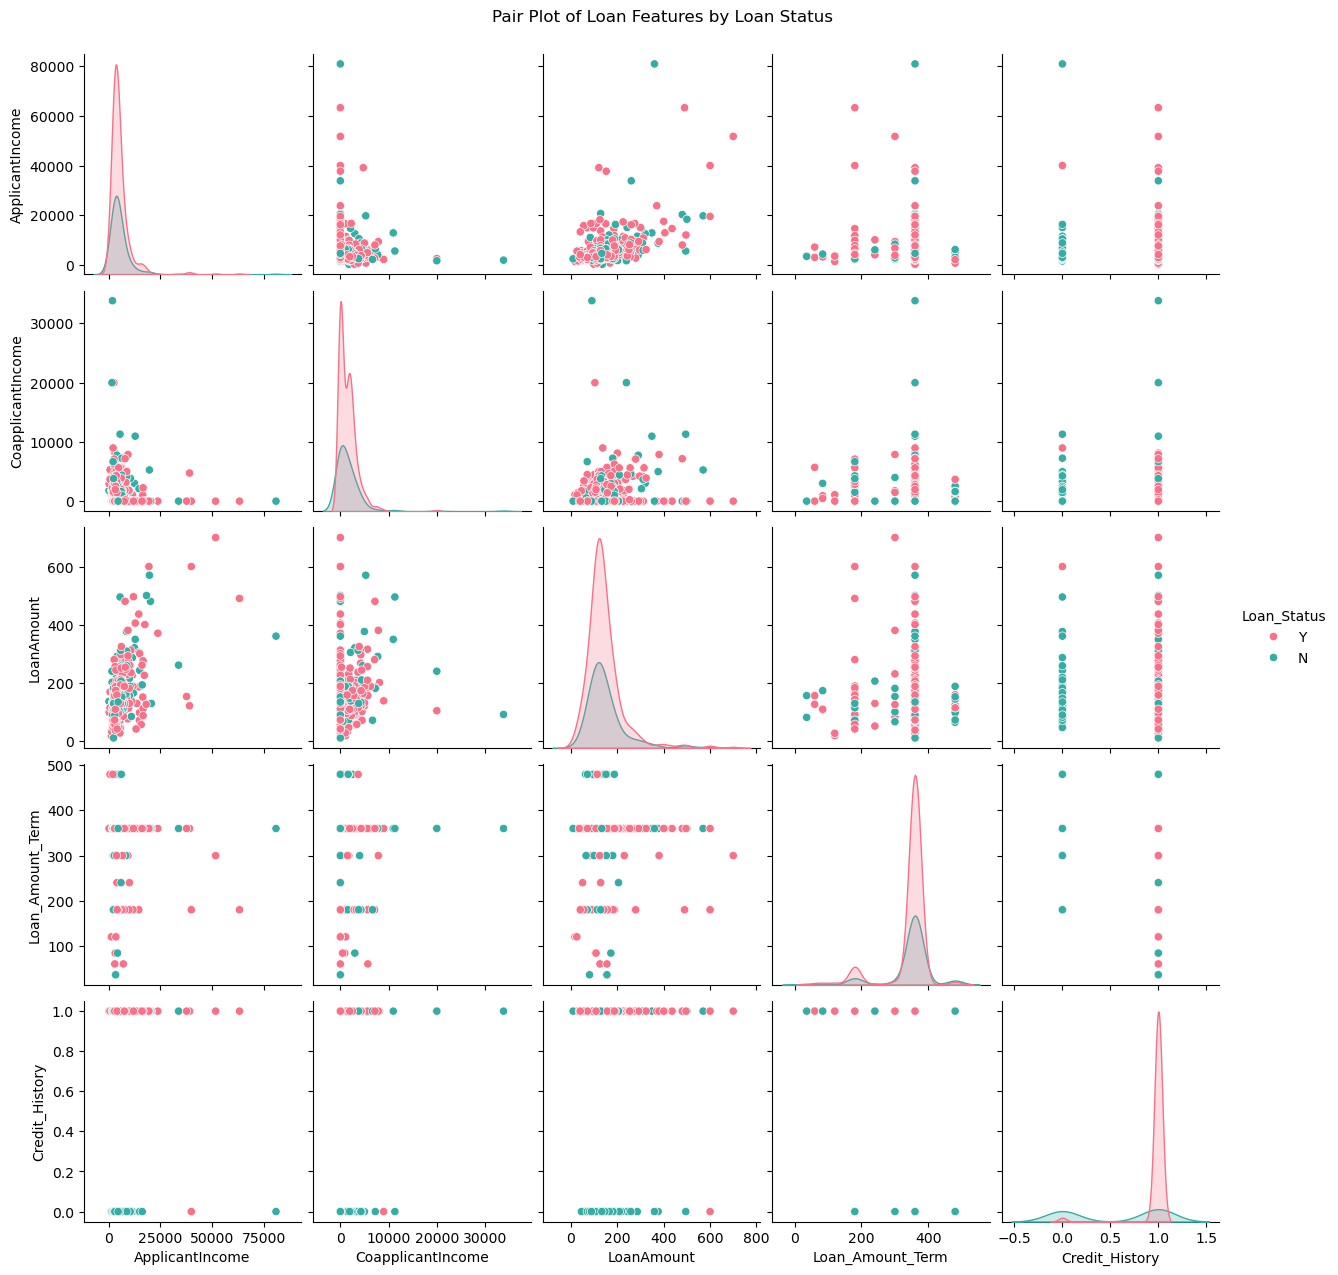

In [196]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

df_plot = df[cols].dropna()

sns.pairplot(df_plot, hue='Loan_Status', diag_kind='kde', palette='husl')
plt.suptitle("Pair Plot of Loan Features by Loan Status", y=1.02)
plt.show()

In [197]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [198]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Numeric,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,6000.0


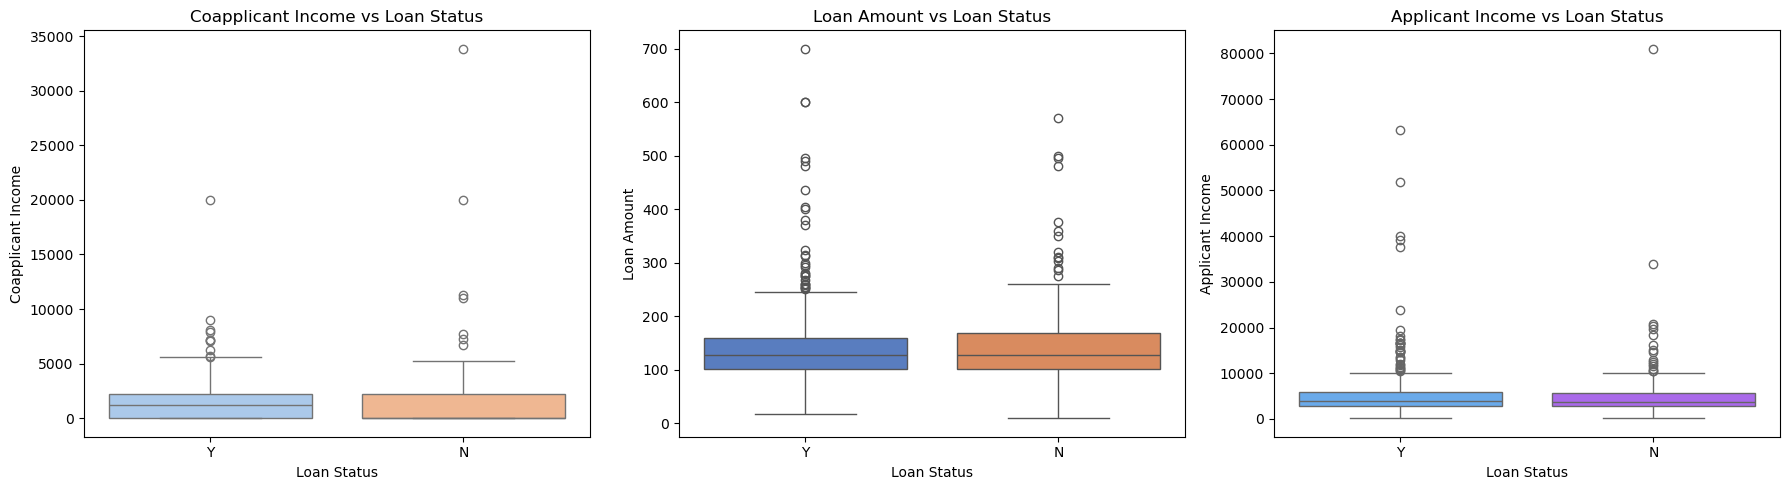

In [199]:
plt.figure(figsize=(18, 5))  

plt.subplot(1, 3, 1)
sns.boxplot(y=df["CoapplicantIncome"], x=df["Loan_Status"], palette='pastel')
plt.title("Coapplicant Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Coapplicant Income")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["LoanAmount"], x=df["Loan_Status"], palette='muted')
plt.title("Loan Amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["ApplicantIncome"], x=df["Loan_Status"], palette='cool')
plt.title("Applicant Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")

plt.tight_layout()
plt.show()

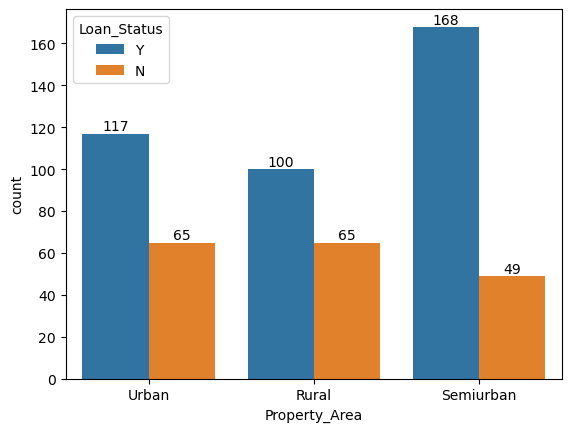

In [200]:
ax = sns.countplot(x = df["Property_Area"],hue = df["Loan_Status"])
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [201]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Numeric,TotalIncome
ApplicantIncome,1.000000,-0.126174,0.564600,-0.061693,-0.014715,-0.004530,0.924784
CoapplicantIncome,-0.126174,1.000000,0.159093,-0.000967,-0.002056,-0.033784,0.260769
LoanAmount,0.564600,0.159093,1.000000,0.021006,-0.007543,-0.028433,0.610478
Loan_Amount_Term,-0.061693,-0.000967,0.021006,1.000000,-0.003735,-0.019790,-0.060409
Credit_History,-0.014715,-0.002056,-0.007543,-0.003735,1.000000,0.561678,-0.015109
Loan_Status_Numeric,-0.004530,-0.033784,-0.028433,-0.019790,0.561678,1.000000,-0.017367
TotalIncome,0.924784,0.260769,0.610478,-0.060409,-0.015109,-0.017367,1.000000


In [202]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Numeric,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,6000.0


In [203]:
df["Dependents"].value_counts()

Dependents
0     331
2      95
1      90
3+     48
Name: count, dtype: int64

In [204]:
df.drop(columns = ["Loan_ID","Loan_Status"],inplace = True)

In [205]:
df = pd.get_dummies(df, columns=['Gender','Property_Area', 'Self_Employed', 'Married', 'Education','Dependents'],drop_first = True)

In [206]:
df = df.astype(float)

In [207]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Numeric,TotalIncome,Gender_Male,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+
0,5849.0,0.0,128.0,360.0,1.0,1.0,5849.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4583.0,1508.0,128.0,360.0,1.0,0.0,6091.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,3000.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,4941.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,6000.0,0.0,141.0,360.0,1.0,1.0,6000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status_Numeric',
       'TotalIncome', 'Gender_Male', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Self_Employed_Yes', 'Married_Yes',
       'Education_Not Graduate', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

## **Model Building**

In [209]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler,RobustScaler

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [211]:
x = df.drop(columns = ["Loan_Status_Numeric"])
y = df["Loan_Status_Numeric"]

In [212]:
scaler = RobustScaler()
x = scaler.fit_transform(x)

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [214]:
lr = LogisticRegression(max_iter = 1000,penalty = "l2")
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()

In [215]:
lr.fit(x_train,y_train)
yhat1 = lr.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.831858407079646
              precision    recall  f1-score   support

         0.0       0.95      0.54      0.69        39
         1.0       0.80      0.99      0.88        74

    accuracy                           0.83       113
   macro avg       0.88      0.76      0.79       113
weighted avg       0.85      0.83      0.82       113



In [216]:
knn.fit(x_train,y_train)
yhat1 = knn.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.6991150442477876
              precision    recall  f1-score   support

         0.0       0.62      0.33      0.43        39
         1.0       0.72      0.89      0.80        74

    accuracy                           0.70       113
   macro avg       0.67      0.61      0.61       113
weighted avg       0.68      0.70      0.67       113



In [217]:
dt.fit(x_train,y_train)
yhat1 = dt.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.7610619469026548
              precision    recall  f1-score   support

         0.0       0.67      0.62      0.64        39
         1.0       0.81      0.84      0.82        74

    accuracy                           0.76       113
   macro avg       0.74      0.73      0.73       113
weighted avg       0.76      0.76      0.76       113



In [218]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

In [219]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

In [220]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm

In [221]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.6637168141592921
              precision    recall  f1-score   support

         0.0       0.51      0.56      0.54        39
         1.0       0.76      0.72      0.74        74

    accuracy                           0.66       113
   macro avg       0.63      0.64      0.64       113
weighted avg       0.67      0.66      0.67       113

[[22 17]
 [21 53]]
For  KN
Accuracy -  0.7433628318584071
              precision    recall  f1-score   support

         0.0       0.75      0.38      0.51        39
         1.0       0.74      0.93      0.83        74

    accuracy                           0.74       113
   macro avg       0.75      0.66      0.67       113
weighted avg       0.74      0.74      0.72       113

[[15 24]
 [ 5 69]]
For  DT
Accuracy -  0.8141592920353983
              precision    recall  f1-score   support

         0.0       0.88      0.54      0.67        39
         1.0       0.80      0.96      0.87        74

    accuracy              

## **Using SMOTE due to Imbalance Data**

In [243]:
from imblearn.over_sampling import SMOTE

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [245]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [246]:
y_train_resampled.value_counts()

Loan_Status_Numeric
1.0    311
0.0    311
Name: count, dtype: int64

In [247]:
x_train = x_train_resampled
y_train = y_train_resampled

In [248]:
lr = LogisticRegression(max_iter = 1000,penalty = "l2")
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()

In [249]:
lr.fit(x_train,y_train)
yhat1 = lr.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.7433628318584071
              precision    recall  f1-score   support

         0.0       0.62      0.64      0.63        39
         1.0       0.81      0.80      0.80        74

    accuracy                           0.74       113
   macro avg       0.72      0.72      0.72       113
weighted avg       0.74      0.74      0.74       113



In [250]:
knn.fit(x_train,y_train)
yhat1 = knn.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.6548672566371682
              precision    recall  f1-score   support

         0.0       0.50      0.64      0.56        39
         1.0       0.78      0.66      0.72        74

    accuracy                           0.65       113
   macro avg       0.64      0.65      0.64       113
weighted avg       0.68      0.65      0.66       113



In [251]:
dt.fit(x_train,y_train)
yhat1 = dt.predict(x_test)
print("accuracy : ",accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

accuracy :  0.6814159292035398
              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        39
         1.0       0.80      0.69      0.74        74

    accuracy                           0.68       113
   macro avg       0.66      0.68      0.67       113
weighted avg       0.70      0.68      0.69       113



In [252]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

In [253]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

In [254]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm

In [255]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.5663716814159292
              precision    recall  f1-score   support

         0.0       0.42      0.69      0.52        39
         1.0       0.76      0.50      0.60        74

    accuracy                           0.57       113
   macro avg       0.59      0.60      0.56       113
weighted avg       0.64      0.57      0.57       113

[[27 12]
 [37 37]]
For  KN
Accuracy -  0.7168141592920354
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60        39
         1.0       0.79      0.77      0.78        74

    accuracy                           0.72       113
   macro avg       0.69      0.69      0.69       113
weighted avg       0.72      0.72      0.72       113

[[24 15]
 [17 57]]
For  DT
Accuracy -  0.7876106194690266
              precision    recall  f1-score   support

         0.0       0.78      0.54      0.64        39
         1.0       0.79      0.92      0.85        74

    accuracy              

## **Using UnderSampler due to Imbalance Data**

In [257]:
from imblearn.under_sampling import RandomUnderSampler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rus = RandomUnderSampler(random_state=42)
x_train, y_train = rus.fit_resample(x_train, y_train)


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm



accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.6106194690265486
              precision    recall  f1-score   support

         0.0       0.46      0.72      0.56        39
         1.0       0.79      0.55      0.65        74

    accuracy                           0.61       113
   macro avg       0.62      0.64      0.61       113
weighted avg       0.67      0.61      0.62       113

[[28 11]
 [33 41]]
For  KN
Accuracy -  0.6814159292035398
              precision    recall  f1-score   support

         0.0       0.54      0.56      0.55        39
         1.0       0.76      0.74      0.75        74

    accuracy                           0.68       113
   macro avg       0.65      0.65      0.65       113
weighted avg       0.69      0.68      0.68       113

[[22 17]
 [19 55]]
For  DT
Accuracy -  0.7787610619469026
              precision    recall  f1-score   support

         0.0       0.75      0.54      0.63        39
         1.0       0.79      0.91      0.84        74

    accuracy              

## **Using Over Sampler due to Imbalance Data**

In [258]:
from imblearn.over_sampling import RandomOverSampler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rus = RandomOverSampler(random_state=42)
x_train, y_train = rus.fit_resample(x_train, y_train)


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'XGBC':xgb
}

def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return accuracy,cr,cm



accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,cm11 = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print(current_precision)
    print(cm11)

For  SVC
Accuracy -  0.584070796460177
              precision    recall  f1-score   support

         0.0       0.43      0.59      0.49        39
         1.0       0.73      0.58      0.65        74

    accuracy                           0.58       113
   macro avg       0.58      0.59      0.57       113
weighted avg       0.62      0.58      0.59       113

[[23 16]
 [31 43]]
For  KN
Accuracy -  0.7079646017699115
              precision    recall  f1-score   support

         0.0       0.57      0.64      0.60        39
         1.0       0.80      0.74      0.77        74

    accuracy                           0.71       113
   macro avg       0.68      0.69      0.69       113
weighted avg       0.72      0.71      0.71       113

[[25 14]
 [19 55]]
For  DT
Accuracy -  0.7876106194690266
              precision    recall  f1-score   support

         0.0       0.71      0.64      0.68        39
         1.0       0.82      0.86      0.84        74

    accuracy               

## **Conclusion :** 
### Nothing Helps like (SMOTE,OVERSAMPLER,UNDERSAMPLER) Simple Models are performing the best on test data the final models selected for the Stacking and Vottig are the LogisticRegression, RandomForest, Adaboostcalssifier First we will perform hyper parameter Tunning and then we will perform stacking and etc

## **Hyper Parameter Tunning**

In [267]:
x = df.drop(columns = ["Loan_Status_Numeric"])
y = df["Loan_Status_Numeric"]

In [268]:
scaler = RobustScaler()
x = scaler.fit_transform(x)

In [269]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [270]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [271]:
logreg = LogisticRegression(solver='liblinear')

logreg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_logreg = GridSearchCV(logreg, logreg_params, cv=skf, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(x_train, y_train)

print("Best Logistic Regression:", grid_logreg.best_params_)
y_pred_logreg = grid_logreg.best_estimator_.predict(x_test)

print("🔹 Logistic Regression")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=["Rejected (0)", "Approved (1)"]))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

Best Logistic Regression: {'C': 0.1, 'penalty': 'l1'}
🔹 Logistic Regression
✅ Accuracy: 0.831858407079646
📄 Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.95      0.54      0.69        39
Approved (1)       0.80      0.99      0.88        74

    accuracy                           0.83       113
   macro avg       0.88      0.76      0.79       113
weighted avg       0.85      0.83      0.82       113

📊 Confusion Matrix:
[[21 18]
 [ 1 73]]


In [272]:
rf = RandomForestClassifier(random_state=2)

rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_rf = GridSearchCV(rf, rf_params, cv=skf, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("Best Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.best_estimator_.predict(x_test)

print("🔹 Random Forest")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Rejected (0)", "Approved (1)"]))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Best Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
🔹 Random Forest
✅ Accuracy: 0.8407079646017699
📄 Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.84      0.67      0.74        39
Approved (1)       0.84      0.93      0.88        74

    accuracy                           0.84       113
   macro avg       0.84      0.80      0.81       113
weighted avg       0.84      0.84      0.84       113

📊 Confusion Matrix:
[[26 13]
 [ 5 69]]


In [273]:
ab = AdaBoostClassifier(random_state=2)

ab_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_ab = GridSearchCV(ab, ab_params, cv=skf, scoring='accuracy', n_jobs=-1)
grid_ab.fit(x_train, y_train)

print("Best AdaBoost:", grid_ab.best_params_)
y_pred_ab = grid_ab.best_estimator_.predict(x_test)

print("🔹 AdaBoost")
print("✅ Accuracy:", accuracy_score(y_test, y_pred_ab))
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_ab, target_names=["Rejected (0)", "Approved (1)"]))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ab))

Best AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
🔹 AdaBoost
✅ Accuracy: 0.831858407079646
📄 Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.95      0.54      0.69        39
Approved (1)       0.80      0.99      0.88        74

    accuracy                           0.83       113
   macro avg       0.88      0.76      0.79       113
weighted avg       0.85      0.83      0.82       113

📊 Confusion Matrix:
[[21 18]
 [ 1 73]]


In [274]:
lr = LogisticRegression(solver='liblinear', C=0.1, penalty='l1', random_state=42)

rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

ab = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    random_state=42
)

In [276]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

## **StackingClassifier**

In [277]:
stacking_clf = StackingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('ab', ab)],
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=5,
    passthrough=False,
    n_jobs=-1
)

stacking_clf.fit(x_train, y_train)

y_pred_stack = stacking_clf.predict(x_test)

print("\n🔷 Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack, target_names=["Rejected (0)", "Approved (1)"]))


🔷 Stacking Classifier
Accuracy: 0.831858407079646
Confusion Matrix:
 [[21 18]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

Rejected (0)       0.95      0.54      0.69        39
Approved (1)       0.80      0.99      0.88        74

    accuracy                           0.83       113
   macro avg       0.88      0.76      0.79       113
weighted avg       0.85      0.83      0.82       113



## **VotingClassifier**

In [279]:
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf), ('ab', ab)],
    voting='soft',
    n_jobs=-1
)

voting_clf.fit(x_train, y_train)

y_pred_vote = voting_clf.predict(x_test)

print("\n🔷 Voting Classifier (Hard)")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))
print("Classification Report:\n", classification_report(y_test, y_pred_vote, target_names=["Rejected (0)", "Approved (1)"]))


🔷 Voting Classifier (Hard)
Accuracy: 0.831858407079646
Confusion Matrix:
 [[21 18]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

Rejected (0)       0.95      0.54      0.69        39
Approved (1)       0.80      0.99      0.88        74

    accuracy                           0.83       113
   macro avg       0.88      0.76      0.79       113
weighted avg       0.85      0.83      0.82       113



## **The Stacking and Votting Classifiers are Performing WELL and equally we can choose any one on them**

In [281]:
import pickle

In [282]:
pickle.dump(voting_clf,open("voting_model_credit_risk.pkl","wb"))
pickle.dump(scaler, open('scaler_voting_model_credit_risk.pkl','wb'))